In [8]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [9]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [10]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [11]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [12]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
engine = create_engine("sqlite:///Resources/hawaii.sqlite")  # Corrected file path
Base.prepare(autoload_with=engine)




In [13]:
# View all of the classes that automap found
Base.classes.keys()


['station', 'measurement']

In [14]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station



In [15]:
# Create our session (link) from Python to the DB
session = Session(engine)



# Exploratory Precipitation Analysis

In [16]:
# Ensure session is defined
session = Session(engine)

# Find the most recent date in the data set.
recent_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()[0]
one_year_ago = dt.datetime.strptime(recent_date, "%Y-%m-%d") - dt.timedelta(days=365)



The most recent date in the dataset is 2017-08-23.


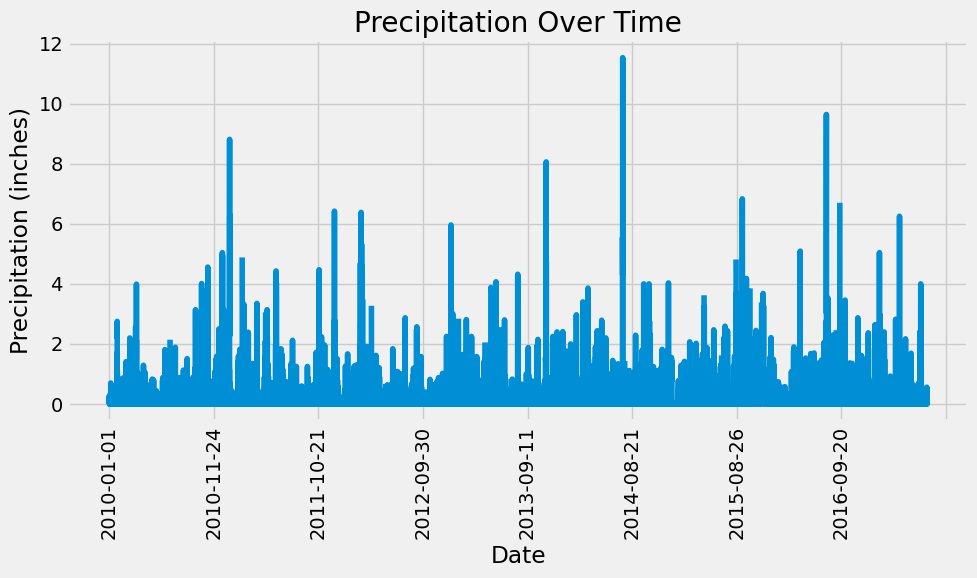

In [17]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
recent_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()[0]
print(f"The most recent date in the dataset is {recent_date}.")

# Calculate the date one year from the last date in data set.
one_year_ago = dt.datetime.strptime(recent_date, "%Y-%m-%d") - dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores
precipitation_scores = session.query(Measurement.date, Measurement.prcp).all()



# Save the query results as a Pandas DataFrame. Explicitly set the column names
precipitation_df = pd.DataFrame(precipitation_scores, columns=["date", "precipitation"])

# Sort the dataframe by date
precipitation_df = precipitation_df.sort_values(by="date")

# Use Pandas Plotting with Matplotlib to plot the data
# Plot the data
precipitation_df.plot(x="date", y="precipitation", figsize=(10, 6), rot=90, legend=False)

# Add labels and title
plt.title("Precipitation Over Time")
plt.xlabel("Date")
plt.ylabel("Precipitation (inches)")

# Adjust layout and show the plot
plt.tight_layout()
plt.show()


In [18]:
# Use Pandas to calculate the summary statistics for the precipitation data
precipitation_df.describe()



,precipitation
count,18103.000000
mean,0.160644
std,0.468746
min,0.000000
25%,0.000000
50%,0.010000
75%,0.110000
max,11.530000


# Exploratory Station Analysis

In [19]:
# Design a query to calculate the total number of stations in the dataset
station_count = session.query(Station.id).count()



In [20]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.

from sqlalchemy import func

# Query to find the most active stations and their observation counts
active_stations = session.query(
    Measurement.station,
    func.count(Measurement.station)
).group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()

# Display the stations and their counts
active_stations_df = pd.DataFrame(active_stations, columns=["Station", "Count"])
print(active_stations_df)



       Station  Count
0  USC00519281   2772
1  USC00519397   2724
2  USC00513117   2709
3  USC00519523   2669
4  USC00516128   2612
5  USC00514830   2202
6  USC00511918   1979
7  USC00517948   1372
8  USC00518838    511


In [21]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
# Get the station ID of the most active station
most_active_station = active_stations[0][0]
print(f"The most active station is: {most_active_station}")

# Query to calculate the lowest, highest, and average temperature for the most active station
temp_stats = session.query(
    func.min(Measurement.tobs),
    func.avg(Measurement.tobs),
    func.max(Measurement.tobs)
).filter(Measurement.station == most_active_station).all()

# Display the results
print(f"Temperature statistics for station {most_active_station}:")
print(f"Lowest Temperature: {temp_stats[0][0]}°F")
print(f"Average Temperature: {temp_stats[0][1]:.2f}°F")
print(f"Highest Temperature: {temp_stats[0][2]}°F")




The most active station is: USC00519281
Temperature statistics for station USC00519281:
Lowest Temperature: 54.0°F
Average Temperature: 71.66°F
Highest Temperature: 85.0°F


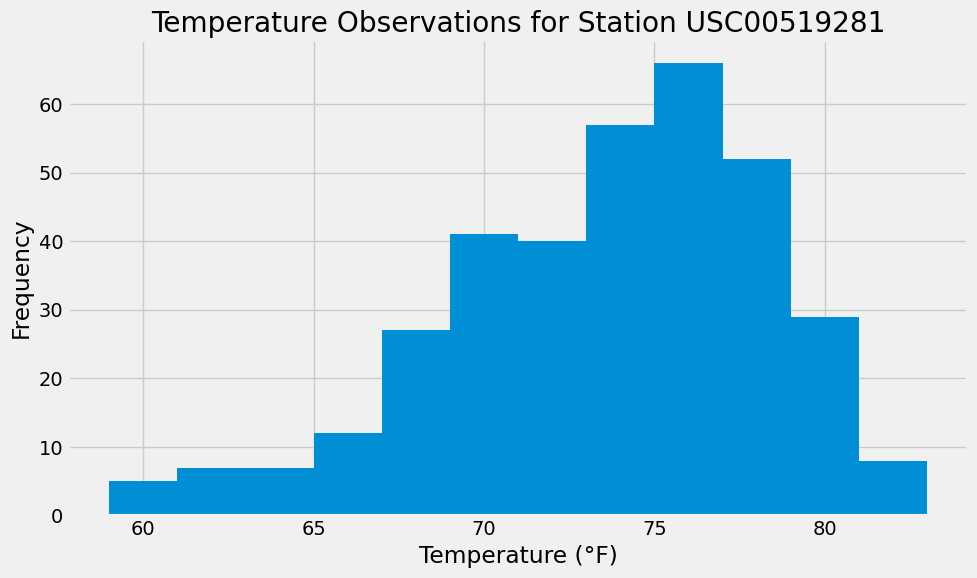

In [22]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
# Query the last 12 months of temperature observation data for the most active station
temperature_data = session.query(Measurement.tobs).filter(
    Measurement.date >= one_year_ago,
    Measurement.station == most_active_station
).all()

# Convert the query results to a Pandas DataFrame
temp_df = pd.DataFrame(temperature_data, columns=["tobs"])

# Plot the results as a histogram
temp_df.plot(kind="hist", bins=12, figsize=(10, 6), legend=False)
plt.title(f"Temperature Observations for Station {most_active_station}")
plt.xlabel("Temperature (°F)")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()


# Close Session

In [23]:
# Close Session
session.close()